# P3 : Concevez une application au service de la santé publique

## Notebook Exploration

Pascaline Grondein

Début de projet : 07/03/2022


L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation, à l’aide du jeu de données Open Foods.


L'application proposée ici est appelée **Made In FooD**. Elle propose de s'adapter au régime alimentaire de son utilisateur.rice, de noter les produits en fonction de ce régime ainsi que de son enpreinte carbone, avec un bonus si le produit est Made In France. L'application peut également proposer une alternative, si elle existe, pour un produit moins salé, moins sucré, avec une empreinte carbone plus faible...


Ce notebook explore le jeu de données, analyse les variables pertinentes et en tire les conclusions nécessaires sur la faisabilité de l'application Made In FooD. 

### Table of Contents

* [I. Récupération des données nettoyées](#chapter1)
* [II. Analyse univariée](#chapter2)
    * [1. Variable qualitative : nutrition grade](#section_2_1)
    * [2. Variables quantitatives discrètes](#section_2_2)
        * [a. Nutrition score](#section_2_2_1)
        * [b. Additifs](#section_2_2_2)
        * [c. Huile de palme](#section_2_2_3)
    * [3. Variables quantitatives continues : Macro & nutriments](#section_2_3)
* [III. Analyse bivariée et multivariée](#chapter3)
    * [1. Corrélation variable qualitative/quantitative](#section_3_1)
    * [2. Corrélation variable quantitative/quantitative](#section_3_2)
        * [a. Pairplot](#section_3_2_1)
        * [b. Heatmap](#section_3_2_2)
        * [c. Matrice de corrélation et tests statistiques](#section_3_2_3)
        * [d. Régression linéaire](#section_3_2_4)
    * [3. ACP](#section_3_3)
* [IV. Conclusion](#chapter4)

In [102]:
#importation des fonctions utiles
from nettoyage import *
from ACP import *


#importation librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import urllib
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import decomposition
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import statsmodels.api as sm

from scipy.stats import pearsonr
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

# <a class="anchor" id="chapter1">I. Récupération des données nettoyées</a>

In [103]:
#Importation du fichier tout en précisant le type de séparation
data = pd.read_csv('fr_openfoodfacts_org_products.csv', sep='\t',decimal='.',low_memory=False)
data_subset = data[['code','url','product_name','generic_name','brands','brands_tags','categories','categories_tags','countries_fr','main_category_fr','nutrition-score-fr_100g','proteins_100g','carbohydrates_100g','sugars_100g','fat_100g','saturated-fat_100g','sodium_100g','origins','origins_tags','labels','labels_tags','manufacturing_places','manufacturing_places_tags','packaging','first_packaging_code_geo','ingredients_from_palm_oil','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil','ingredients_that_may_be_from_palm_oil_n','additives_n','carbon-footprint_100g','emb_codes','emb_codes_tags','traces','nutrition_grade_fr']]
data_subset.astype({'ingredients_from_palm_oil': 'object','ingredients_that_may_be_from_palm_oil':'object',}).dtypes

code                                        object
url                                         object
product_name                                object
generic_name                                object
brands                                      object
brands_tags                                 object
categories                                  object
categories_tags                             object
countries_fr                                object
main_category_fr                            object
nutrition-score-fr_100g                    float64
proteins_100g                              float64
carbohydrates_100g                         float64
sugars_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
sodium_100g                                float64
origins                                     object
origins_tags                                object
labels                         

VALEURS MANQUANTES SUR COLONNES
Le dataframe comporte 320772 lignes et 35 colonnes, ainsi que 6013187 valeurs manquantes.


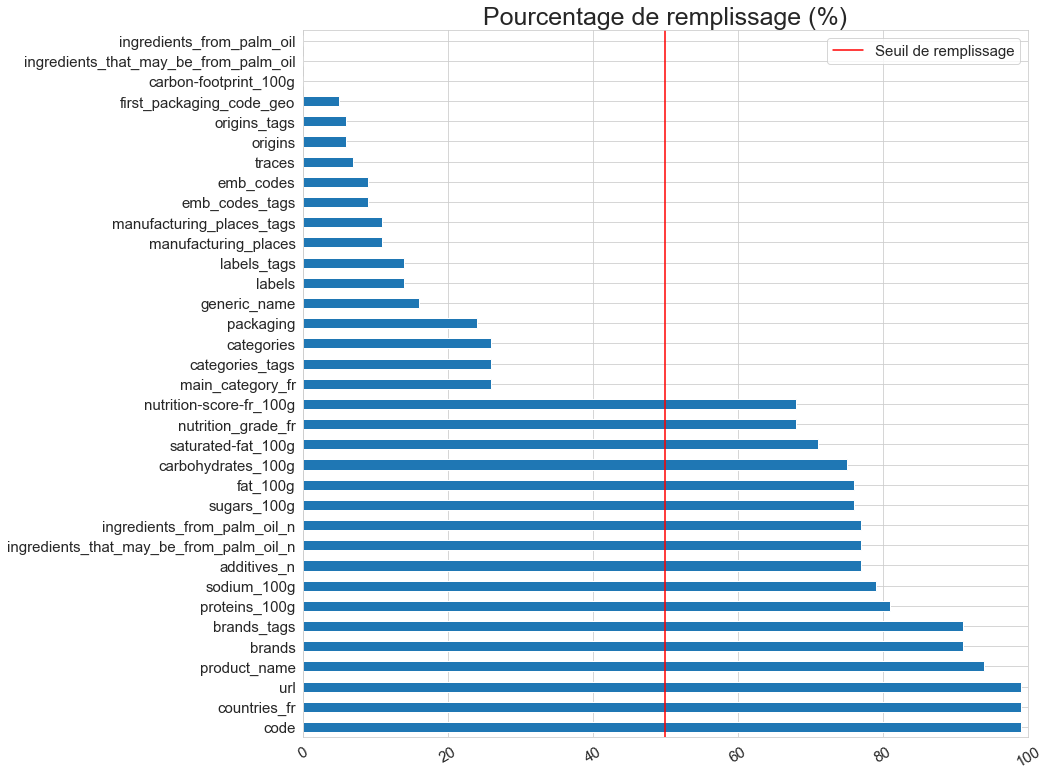

18  variables ont un taux de remplissage sous 50 %.
----------
   
VALEURS MANQUANTES SUR LIGNES
Le dataframe comporte désormais 320772 lignes et 17 colonnes, ainsi que 936786 valeurs manquantes.
46446  lignes ont un taux de remplissage sous 50 %.
----------
   
DOUBLONS
Le dataframe comporte 0 doublons.
----------
   
VALEURS ABERRANTES
   
---Avant traitement---


,nutrition-score-fr_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,additives_n
count,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000
mean,9.328638,6.948274,30.773401,14.887947,11.851615,4.582901,0.757861,0.017771,0.050006,1.849446
std,8.137926,8.188602,28.206288,21.319994,16.718660,7.430121,48.732213,0.133736,0.256639,2.396400
min,-15.000000,-800.000000,0.000000,-17.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.830000,7.060000,1.790000,0.200000,0.000000,0.032708,0.000000,0.000000,0.000000
50%,10.000000,4.760000,20.690000,5.710000,5.000000,1.790000,0.229000,0.000000,0.000000,1.000000
75%,14.000000,9.700000,54.600000,20.000000,17.860000,6.000000,0.511811,0.000000,0.000000,3.000000
max,40.000000,430.000000,2916.670000,3520.000000,714.290000,550.000000,25320.000000,2.000000,6.000000,31.000000


   
   
---Après traitement---


,nutrition-score-fr_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,additives_n
count,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000
mean,8.470528,6.677543,27.193562,13.263023,11.023222,4.368834,0.815184,0.242121,0.242121,1.476364
std,8.089807,7.939456,27.313244,19.378555,16.423203,7.199764,2.740778,1.180723,1.180723,1.765211
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.420000,5.260000,1.100000,0.000000,0.000000,0.015000,0.000000,0.000000,0.000000
50%,10.000000,4.760000,19.850000,5.710000,5.000000,1.790000,0.229000,0.000000,0.000000,1.000000
75%,14.000000,9.090000,50.000000,15.000000,15.790000,6.000000,0.549000,0.000000,0.000000,2.000000
max,40.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,6.000000,6.000000,6.000000


In [104]:
#nettoyage du jeu de données
data_subset = nettoyage(data_subset,pct_seuil_col = 50, pct_seuil_row = 50, itimp = 0,lower_percentile = 0.05,higher_percentile = 0.95)

#  <a class="anchor" id="chapter2">II. Analyse univariée</a>

In [105]:
data_subset.dtypes

code                                        object
url                                         object
product_name                                object
brands                                      object
brands_tags                                 object
countries_fr                                object
nutrition_grade_fr                          object
nutrition-score-fr_100g                    float64
proteins_100g                              float64
carbohydrates_100g                         float64
sugars_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
sodium_100g                                float64
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
additives_n                                float64
dtype: object

Les variables code, url, product name, brands sont des variables d'identification.

Les variables utiles pour l'app sont le nutrition_grade_fr, nutrition-score-fr_100g, proteins_100g, carbohydrates_100g, sugars_100g, fat_100g, saturated-fat_100g, sodium_100g, ingredients_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_n, additives_n.

In [106]:
df = data_subset

##  <a class="anchor" id="section_2_1">1. Variable qualitative : Nutrition grade</a>

In [107]:
df['nutrition_grade_fr'].describe()

count     274326
unique         5
top            d
freq      115921
Name: nutrition_grade_fr, dtype: object

In [108]:
df['nutrition_grade_fr'].value_counts()

d    115921
c     45538
e     43030
a     35630
b     34207
Name: nutrition_grade_fr, dtype: int64

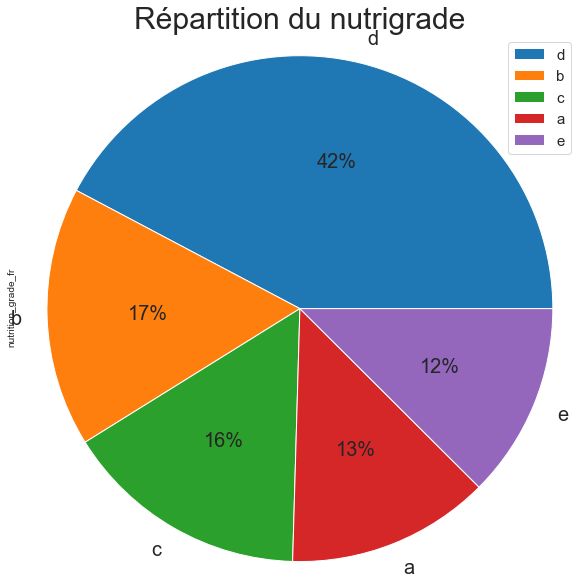

In [109]:
plot = df['nutrition_grade_fr'].value_counts(normalize=True).plot(kind='pie',y='nutrition_grade_fr',labels = df['nutrition_grade_fr'].unique(), autopct='%1.0f%%',figsize=(10, 10),fontsize = 20, legend = True )
plot.set_title('Répartition du nutrigrade',fontsize = 30)
plt.legend(fontsize = 15)
plt.axis('equal') 
plt.show() 

On observe avec ce pie plot que plus de 40% des produits ont un nutrigrade de d. Les autres grades sont répartis de façon plus ou moins égale, autour de 15%.

## <a class="anchor" id="section_2_2">2. Variables quantitatives discrètes </a>

###  <a class="anchor" id="section_2_2_1">a. Nutrition score</a>

In [110]:
df['nutrition-score-fr_100g'].describe()

count    274326.000000
mean          8.470528
std           8.089807
min         -15.000000
25%           1.000000
50%          10.000000
75%          14.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

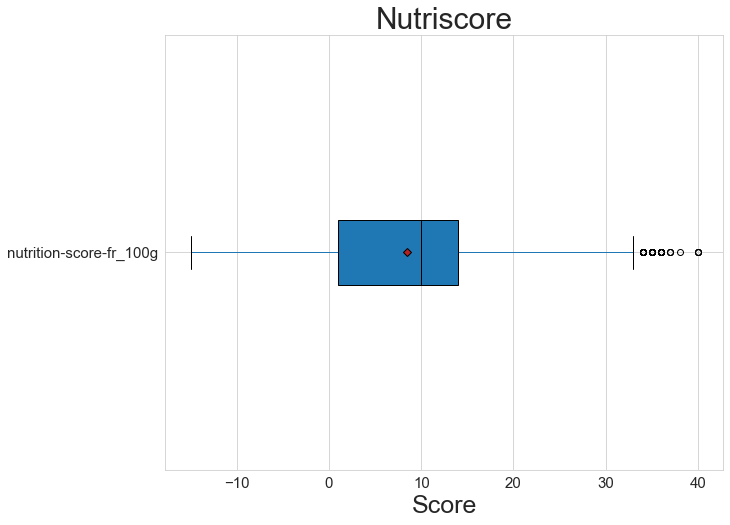

In [111]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=1, color='k')
meanprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')

df.boxplot(column="nutrition-score-fr_100g",boxprops = boxprops,showfliers=True, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Nutriscore",fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Score',fontsize = 25)
plt.ylabel('',fontsize = 25)

plt.show()

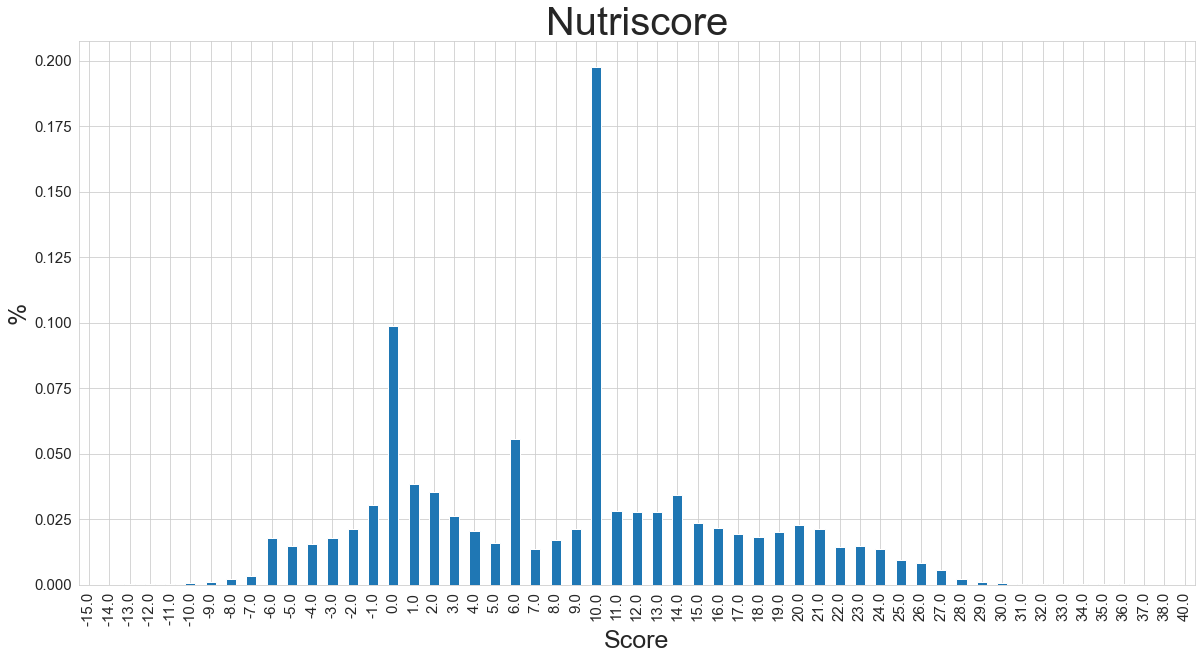

In [112]:
df_nutri = pd.DataFrame(data = df['nutrition-score-fr_100g'].value_counts(normalize = True)).sort_index()
plot = df_nutri.plot.bar(y ='nutrition-score-fr_100g',rot=90,legend = False,figsize = (20,10),)

figsize = (25,20)
plt.title("Nutriscore",fontsize = 40)
plt.xticks(fontsize = 15)
#plot.set_xlim(-15.0, 40.0)
plt.yticks(fontsize = 15)
plt.xlabel('Score',fontsize = 25)
plt.ylabel('%',fontsize = 25)

plt.show()

La distribution du nutriscore semble indiquer une importante proportion de produits possèdant la note 10, cependant, il est possible que ce soit la conséquence du traitement des valeurs manquantes par la médiane. 

### <a class="anchor" id="section_2_2_2">b. Additifs</a>

In [113]:
df['additives_n'].value_counts()

0.0    107859
1.0     70961
2.0     34760
3.0     21525
6.0     16938
4.0     13094
5.0      9189
Name: additives_n, dtype: int64

In [114]:
df['additives_n'].describe()

count    274326.000000
mean          1.476364
std           1.765211
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: additives_n, dtype: float64

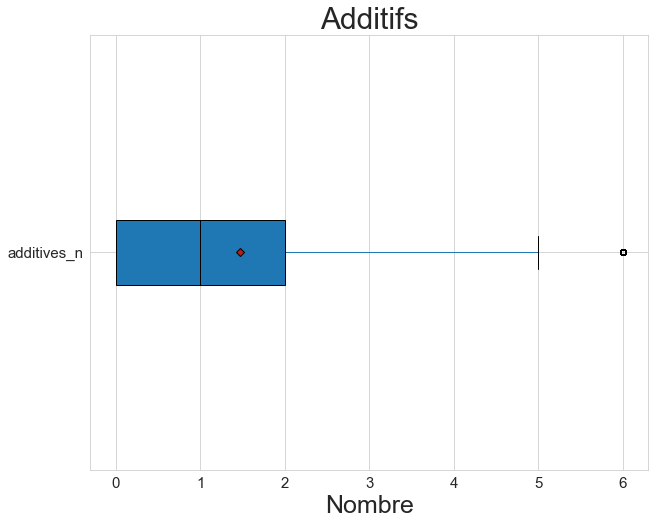

In [115]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=1, color='k')
meanprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')

df.boxplot(column="additives_n",boxprops = boxprops,showfliers=True, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Additifs",fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Nombre',fontsize = 25)
plt.ylabel('',fontsize = 25)

plt.show()

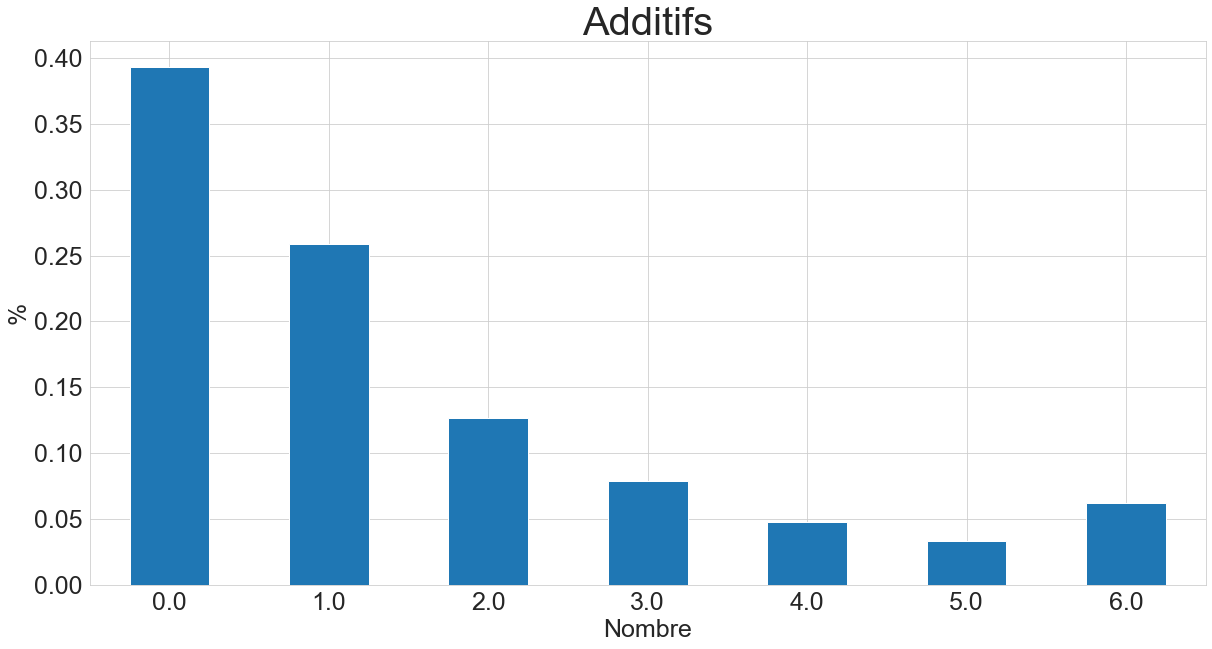

In [116]:
df_add = pd.DataFrame(data = df['additives_n'].value_counts(normalize = True)).sort_index()
plot = df_add.plot.bar(y ='additives_n',rot=0,legend = False,figsize = (20,10))

figsize = (25,20)
plt.title("Additifs",fontsize = 40)
plt.xticks(fontsize = 25)
#plot.set_xlim(-15.0, 40.0)
plt.yticks(fontsize = 25)
plt.xlabel('Nombre',fontsize = 25)
plt.ylabel('%',fontsize = 25)

plt.show()

Ce graphe semble indiquer que près de 40% des produits n'ont pas d'additifs parmi leurs composants, cependant, comme pour le nutriscore, il est possible que le traitement des valeurs manquantes ait eu un impact. Par souscis de précision, je ne sélectionnerais pas cette variable pour l'application.

### <a class="anchor" id="section_2_2_3">c. Huile de palme</a>

In [117]:
df['ingredients_from_palm_oil_n'].value_counts()

0.0    263256
6.0     11070
Name: ingredients_from_palm_oil_n, dtype: int64

In [118]:
df['ingredients_that_may_be_from_palm_oil_n'].value_counts()

0.0    263256
6.0     11070
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64

Les variables liées à l'huile de palme sont trop peu renseignées pour être analysées et utilisées pour l'application. 

##  <a class="anchor" id="section_2_3">3. Variables quantitatives continues : Macros & nutriments </a>

In [119]:
macro = ['proteins_100g','carbohydrates_100g','sugars_100g','fat_100g','saturated-fat_100g','sodium_100g']

In [120]:
df_macro = df[['proteins_100g','carbohydrates_100g','sugars_100g','fat_100g','saturated-fat_100g','sodium_100g']]
df_macro.describe()

,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g
count,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000,274326.000000
mean,6.677543,27.193562,13.263023,11.023222,4.368834,0.815184
std,7.939456,27.313244,19.378555,16.423203,7.199764,2.740778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.420000,5.260000,1.100000,0.000000,0.000000,0.015000
50%,4.760000,19.850000,5.710000,5.000000,1.790000,0.229000
75%,9.090000,50.000000,15.000000,15.790000,6.000000,0.549000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


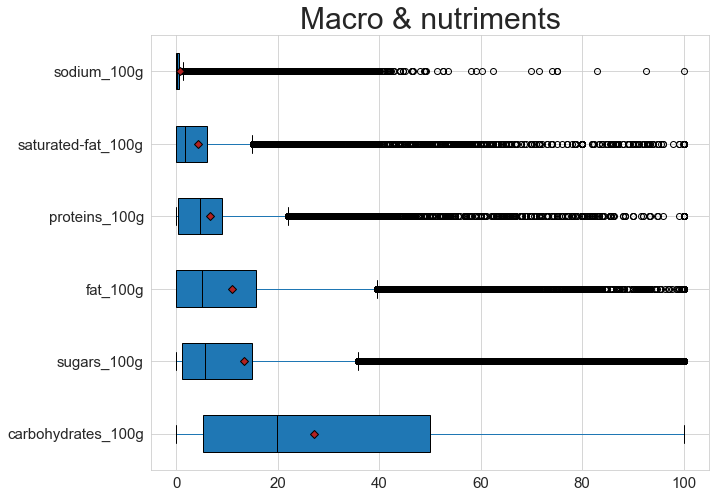

In [121]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=1, color='k')
meanprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')

meds_norm = df_macro.median()
meds_norm.sort_values(ascending=False, inplace=True)
df_macro = df_macro[meds_norm.index]

df_macro.boxplot(boxprops = boxprops,showfliers=True, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Macro & nutriments",fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('',fontsize = 25)
plt.ylabel('',fontsize = 25)

plt.show()

Analyse univariée pour la variable proteins_100g


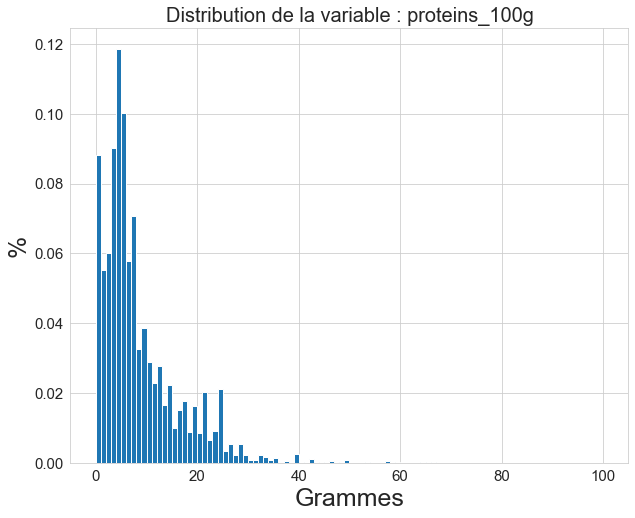

Analyse univariée pour la variable carbohydrates_100g


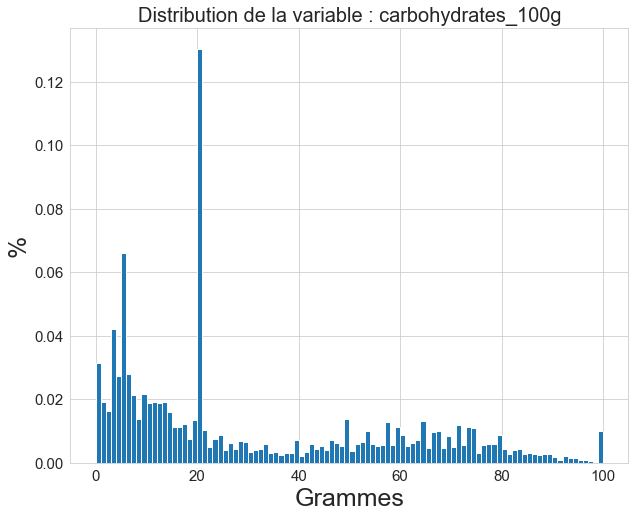

Analyse univariée pour la variable sugars_100g


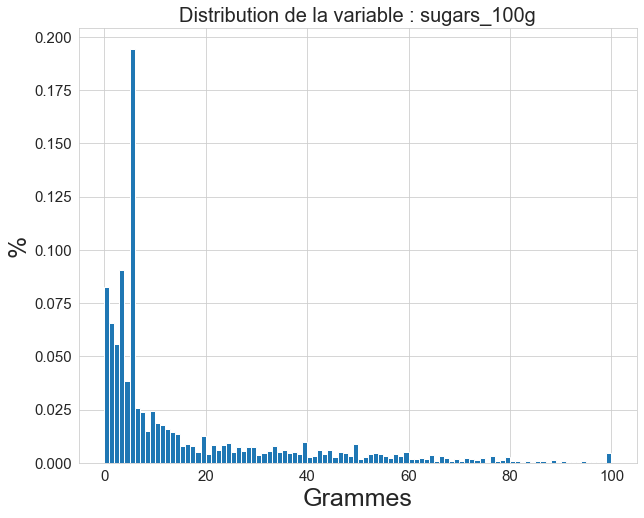

Analyse univariée pour la variable fat_100g


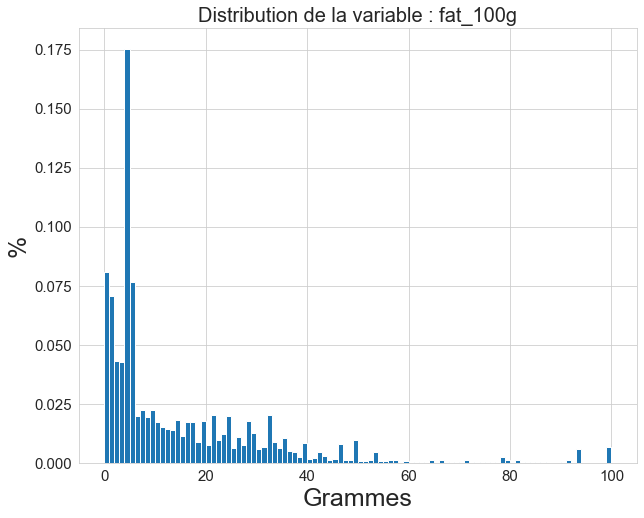

Analyse univariée pour la variable saturated-fat_100g


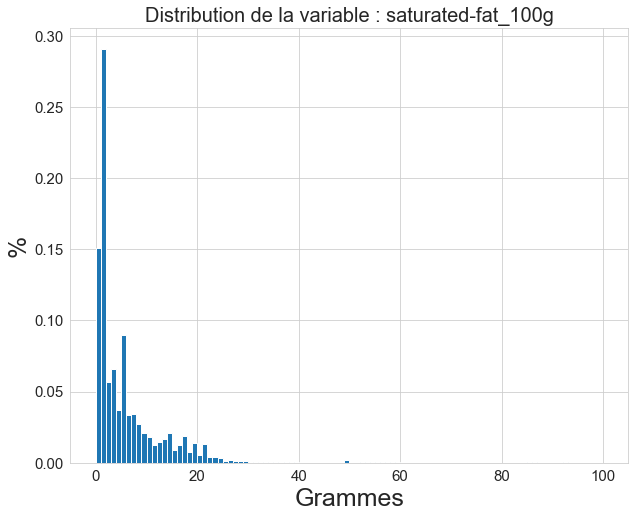

Analyse univariée pour la variable sodium_100g


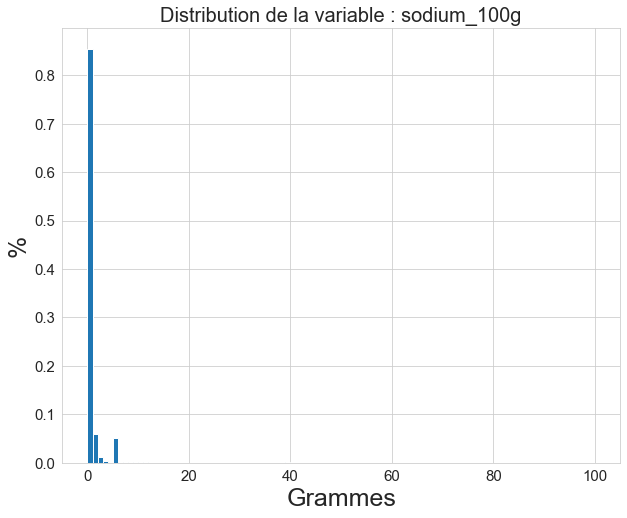

In [122]:
for var in macro :
    
    print('Analyse univariée pour la variable {}'.format(var))
    
    #df[var].hist(density=True,bins=100,figsize = (10,8))
    df[var].where(df[var]>0).hist(density=True,bins=100,figsize = (10,8))

    plt.title('Distribution de la variable : '+var,fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel('Grammes',fontsize = 25)
    plt.ylabel('%',fontsize = 25)

    plt.show()

Pour chaque variables, on remarque que la majorité des produits se situent entre 0 et 20g, exception faite des carbohydrates qui semblent possèder une distribution des valeurs plus étalée.

# <a class="anchor" id="chapter3">III. Analyse bivariée et multivariée</a> 

## <a class="anchor" id="section_3_1">1. Corrélation variable qualitative/quantitative : ANOVA</a>

In [123]:
list_quant = ['nutrition-score-fr_100g','fat_100g']

In [124]:
#Fonction pour calculer le rapport de corrélation
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

---Analyse bivariée pour les variable nutrigrade et nutrition-score-fr_100g---


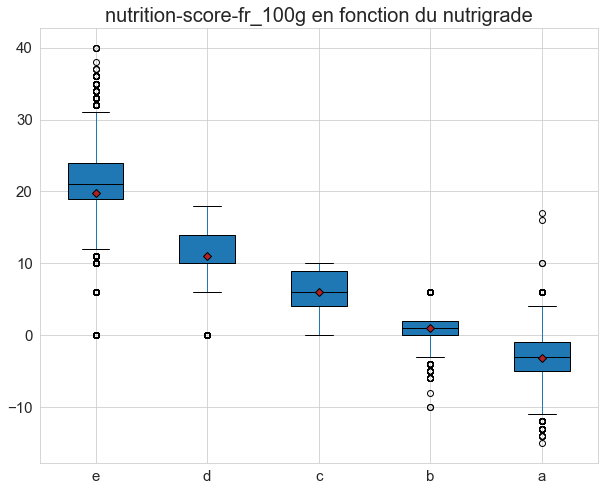

   
Le rapport de corrélation est de 0.7404966968969381
   
---Analyse bivariée pour les variable nutrigrade et fat_100g---


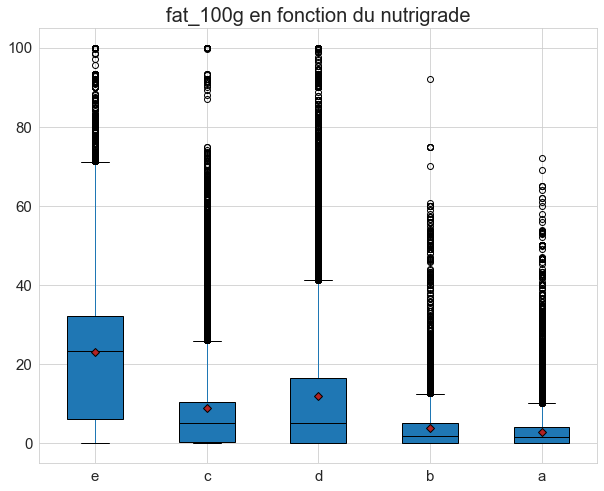

   
Le rapport de corrélation est de 0.14493292784706086
   


In [125]:
for var in list_quant:
    
    print('---Analyse bivariée pour les variable nutrigrade et {}---'.format(var))
    
    df_nutri = df[['nutrition_grade_fr', var]]
    grouped = df_nutri.groupby(['nutrition_grade_fr'])
    df2 = pd.DataFrame({col:vals[var] for col,vals in grouped})
    meds = df2.median()
    meds.sort_values(ascending=False, inplace=True)
    df2 = df2[meds.index]

    boxprops = dict(linestyle='-', linewidth=1, color='k')
    medianprops = dict(linestyle='-', linewidth=1, color='k')
    meanprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,8))
    df2.boxplot(labels=df_nutri['nutrition_grade_fr'].unique(), boxprops = boxprops,showfliers=True, medianprops=medianprops,vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.title("{} en fonction du nutrigrade".format(var),fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()
    
    print('   ')
    print('Le rapport de corrélation est de',eta_squared(df['nutrition_grade_fr'],df[var]))
    print('   ')

On observe que le nutriscore et le nutrigrade sont très corrélés. Plus le nutriscore est haut plus la lettre est basse (e), et inversement.Il est donc possible d'utiliser le nutriscore ou le nutrigrade, mais les deux seraient redondant. Le gras et le nutrigrade sont légèrement corrélés, on observe que les produits possèdant un grade a ou b ont en moyenne moins de gras dans leur composition. 

Effectuons un test de significativité. Posons les hypothèses:

 - H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
 - H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%


In [126]:
df_anova = df[['nutrition_grade_fr','nutrition-score-fr_100g','fat_100g']]
df_anova.rename(columns = {'nutrition_grade_fr':'nutrigrade', 'nutrition-score-fr_100g':'nutriscore'}, inplace = True)
model = ols('nutriscore ~ nutrigrade',data = df_anova).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
display(anova_table)
print(model.summary())

,sum_sq,df,F,PR(>F)
nutrigrade,1.329428e+07,4.0,195694.806155,0.0
Residual,4.658912e+06,274321.0,NaN,NaN


                            OLS Regression Results                            
Dep. Variable:             nutriscore   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                 1.957e+05
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:26:38   Log-Likelihood:            -7.7773e+05
No. Observations:              274326   AIC:                         1.555e+06
Df Residuals:                  274321   BIC:                         1.556e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.2334      0.022   -1

In [127]:
model = ols('fat_100g ~ nutrigrade',data = df_anova).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
display(anova_table)
print(model.summary())


,sum_sq,df,F,PR(>F)
nutrigrade,1.072379e+07,4.0,11624.276912,0.0
Residual,6.326759e+07,274321.0,NaN,NaN


                            OLS Regression Results                            
Dep. Variable:               fat_100g   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:26:55   Log-Likelihood:            -1.1355e+06
No. Observations:              274326   AIC:                         2.271e+06
Df Residuals:                  274321   BIC:                         2.271e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.7782      0.080     

## <a class="anchor" id="section_3_2">2. Corrélation variable quantitatives/quantitative</a>

In [128]:
df_quant = df[['additives_n','nutrition-score-fr_100g','proteins_100g','carbohydrates_100g','sugars_100g','fat_100g','saturated-fat_100g','sodium_100g']]
#df_quant

### <a class="anchor" id="section_3_2_1">a. Pairplot</a>

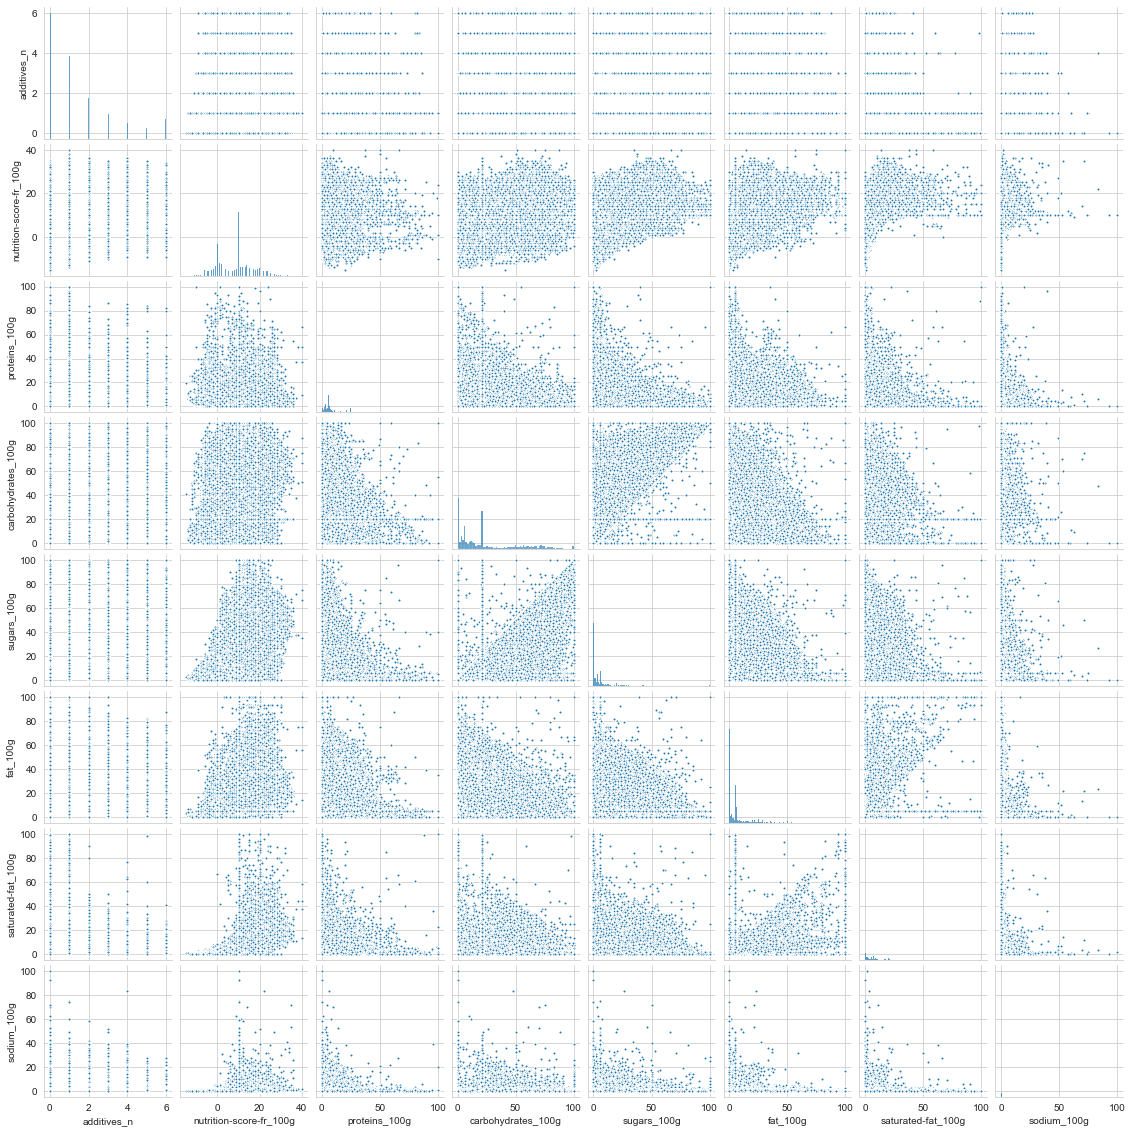

In [129]:
sns.pairplot(df_quant,plot_kws=dict(marker=".", linewidth=1),diag_kind = 'hist',height = 2)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 15)
plt.show()

### <a class="anchor" id="section_3_2_2">b. Heatmap</a> 

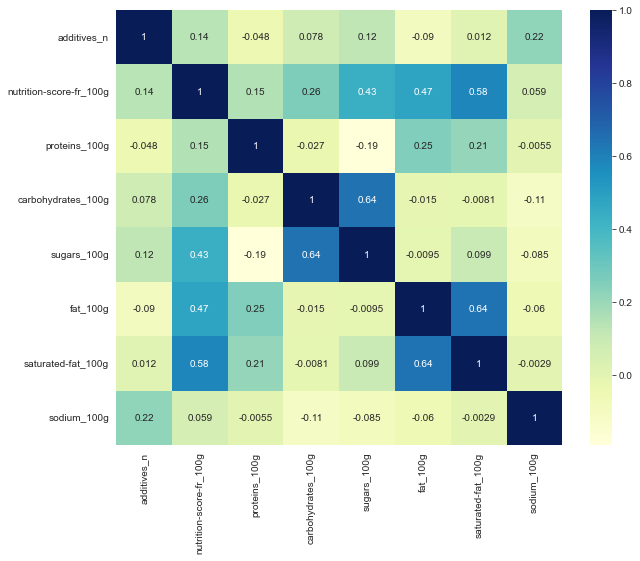

In [130]:
plt.figure(figsize=(10,8))
sns.heatmap(df_quant.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')
plt.show()

Grace à la matrice de corrélation, on voit plus clairement que les couples sucres/carbohydrates, saturated fat/fat, nutriscore/saturated_fat et sugars_100g/nutriscore sont corrélés à un certain degré.

### <a class="anchor" id="section_3_2_3">c. Matrice de corrélation et tests statistiques</a>  

In [131]:
df_corr = df_quant.corr(method='pearson')
df_corr

,additives_n,nutrition-score-fr_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g
additives_n,1.000000,0.136830,-0.047943,0.078012,0.121928,-0.090422,0.011580,0.219025
nutrition-score-fr_100g,0.136830,1.000000,0.149644,0.256654,0.432686,0.473728,0.584114,0.058717
proteins_100g,-0.047943,0.149644,1.000000,-0.026968,-0.192348,0.254609,0.208408,-0.005536
carbohydrates_100g,0.078012,0.256654,-0.026968,1.000000,0.642885,-0.015210,-0.008083,-0.110849
sugars_100g,0.121928,0.432686,-0.192348,0.642885,1.000000,-0.009461,0.099174,-0.085308
fat_100g,-0.090422,0.473728,0.254609,-0.015210,-0.009461,1.000000,0.639150,-0.060107
saturated-fat_100g,0.011580,0.584114,0.208408,-0.008083,0.099174,0.639150,1.000000,-0.002923
sodium_100g,0.219025,0.058717,-0.005536,-0.110849,-0.085308,-0.060107,-0.002923,1.000000


Effectuons des tests statistiques sur ces variables. Posons les hypothèses :

 - H0 : Variables indépendantes si p-value > 5%
 - H1 : Variables non indépendantes si p-value < 5%

Calculons maintenant la matrice des p-values.

In [137]:
a = np.empty((len(df_quant.columns),len(df_quant.columns),))
a[:] = np.nan
for i in range(0,len(df_quant.columns)):
    for j in range(0,len(df_quant.columns)):
        a[i,j] = pearsonr(df_quant.iloc[:,i], df_quant.iloc[:,j])[1]

df_pvalue = round(pd.DataFrame(a, columns=df_quant.columns, index = df_quant.columns),5)

In [140]:
cm = sns.light_palette("green", as_cmap=True) 

df_pvalue.\
style.background_gradient(cmap=cm).set_precision(5)

,additives_n,nutrition-score-fr_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g
additives_n,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
nutrition-score-fr_100g,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
proteins_100g,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00373
carbohydrates_100g,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00002,0.00000
sugars_100g,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
fat_100g,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
saturated-fat_100g,0.00000,0.00000,0.00000,0.00002,0.00000,0.00000,0.00000,0.12583
sodium_100g,0.00000,0.00000,0.00373,0.00000,0.00000,0.00000,0.12583,0.00000


### <a class="anchor" id="section_3_2_4">d. Régression linéaire</a> 

On observe les couple de variables qui semblaient corrélées en étudiant la heatmap.

----Analyse bivariée pour les variable sugars_100g et nutrition-score-fr_100g.----
  
La valeur de R² est  0.18721759830806695
La p-value est de 0.0
  


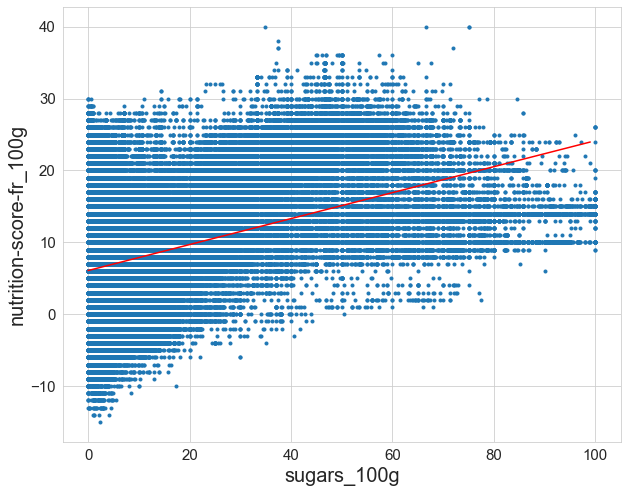

a =  0.18063008147983883 , b =  6.074826907852628
  
***************
  
----Analyse bivariée pour les variable fat_100g et nutrition-score-fr_100g.----
  
La valeur de R² est  0.22441809204758623
La p-value est de 0.0
  


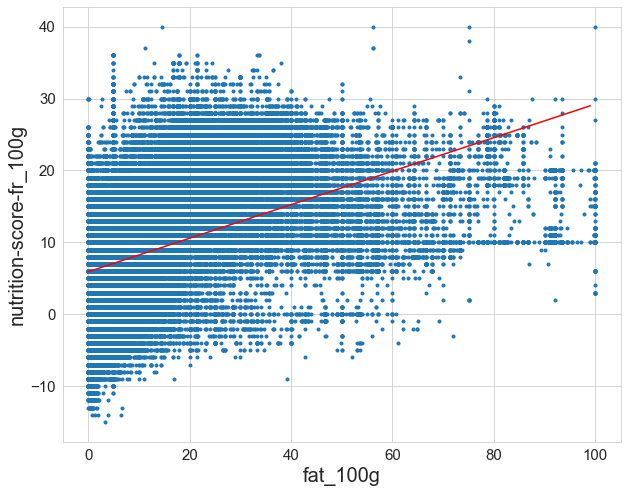

a =  0.23335074826009566 , b =  5.898250629539737
  
***************
  
----Analyse bivariée pour les variable saturated-fat_100g et nutrition-score-fr_100g.----
  
La valeur de R² est  0.34118966473736956
La p-value est de 0.0
  


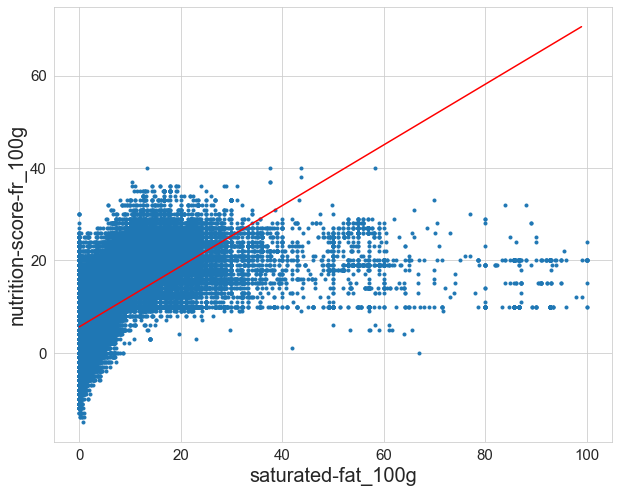

a =  0.6563232737735554 , b =  5.603160546798153
  
***************
  
----Analyse bivariée pour les variable sugars_100g et carbohydrates_100g.----
  
La valeur de R² est  0.4133016647296409
La p-value est de 0.0
  


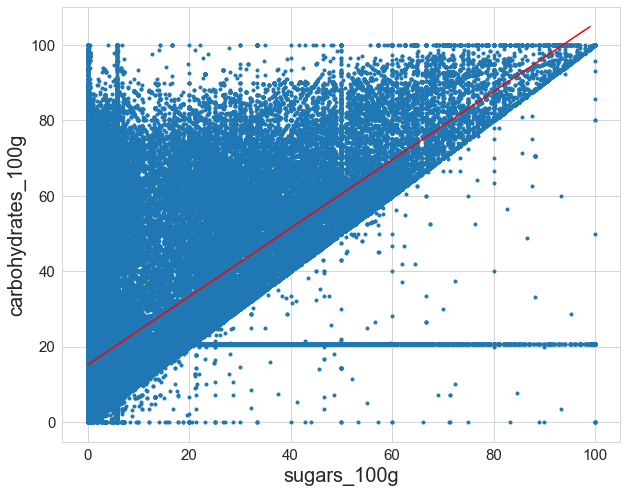

a =  0.906119482313499 , b =  15.175678708784135
  
***************
  
----Analyse bivariée pour les variable saturated-fat_100g et fat_100g.----
  
La valeur de R² est  0.40851259130461737
La p-value est de 0.0
  


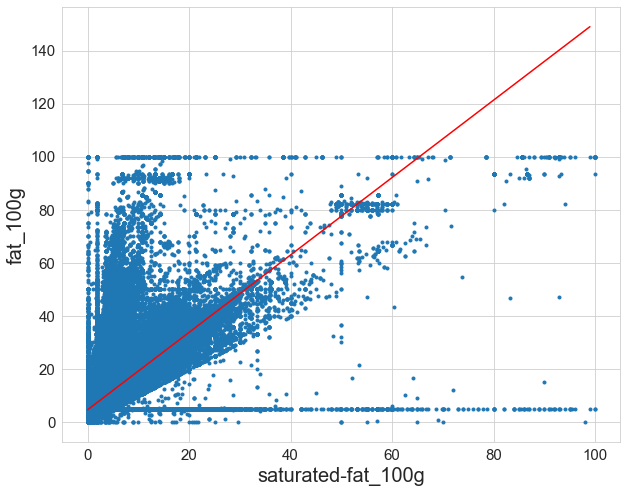

a =  1.457948992113451 , b =  4.653685497356438
  
***************
  


In [145]:
seuil_corr = 0.4
corr_ = []
for col in df_corr:
    for row in df_corr:
        corr = df_corr.loc[row,col]
        #corr_.append(corr)
        if corr not in corr_:
            
            if (abs(corr) > seuil_corr) & (corr < 1):
            
                corr_.append(corr)
                
                print('----Analyse bivariée pour les variable {}'.format(row),'et {}.----'.format(col))
            
                Y = df_quant[col]
                X = df_quant[[row]]

                X = X.copy() # On modifiera X, on en crée donc une copie
                X['intercept'] = 1.
                result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
                a,b = result.params[row],result.params['intercept']
            
                print('  ')
                print('La valeur de R² est ',result.rsquared)
                print('La p-value est de',result.pvalues[1])
                print('  ')
                
            
                sns.set_style("whitegrid")
                plt.figure(figsize=(10,8))
                plt.plot(df_quant[[row]],df_quant[col], ".")
                plt.plot(np.arange(100),[a*x+b for x in np.arange(100)],color = 'red')
                plt.xlabel(row, fontsize = 20)
                plt.ylabel(col, fontsize = 20)
                plt.xticks(fontsize = 15)
                plt.yticks(fontsize = 15)
                plt.show()
                print('a = ',a,', b = ',b)
                print('  ')
                print('***************')
                print('  ')
            

Les variables saturated_fat/fat sugars/carbohydrates semblent assez corrélées. Il serait alors possible de ne considérer que carbohydrates et fat comme variables principales pour ces couples.

## <a class="anchor" id="section_3_3">3. ACP</a> 

In [51]:
# choix du nombre de composantes à calculer
n_comp = 6

In [52]:
names = df_quant.index 
features = df_quant.columns
X = df_quant.values
#X

In [53]:
#Centrage et réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X) 

In [54]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp) #calcul des composantes PCA
pca.fit(X_scaled) #Fit the model with X_scaled

PCA(n_components=6)

In [56]:
#Calcul du seuil d'inertie
#inertie_seuil = (100/len(df_quant.columns))
#print('Considérons les axes dont l\'inertie associée est supérieure à',inertie_seuil,'%.')

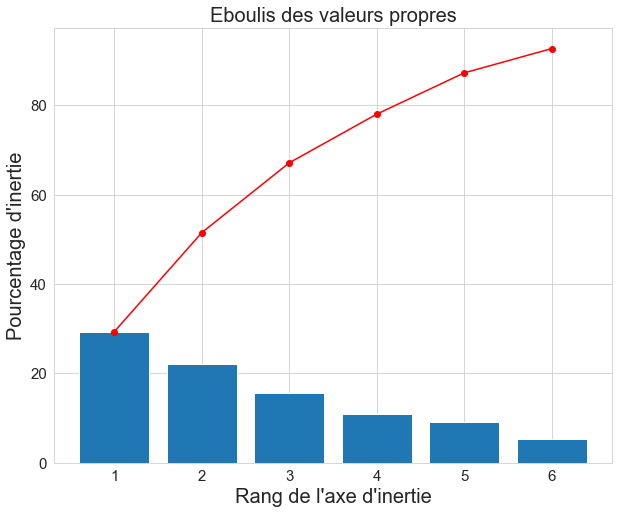

In [57]:
# Eboulis des valeurs propres
#plt.figure(figsize=(10,8))
display_scree_plot(pca)

Par ce graphe on constate que les deux premières composantes couvrent 50% de l'inertie de la population. En utilisant également les composantes 3 et 4, on atteint quasiment 80%. 

In [61]:
#Cercle des corrélations
pcs = pca.components_ #Principal axes in feature space, representing the directions of maximum variance in the data.  The components are sorted by explained_variance_.

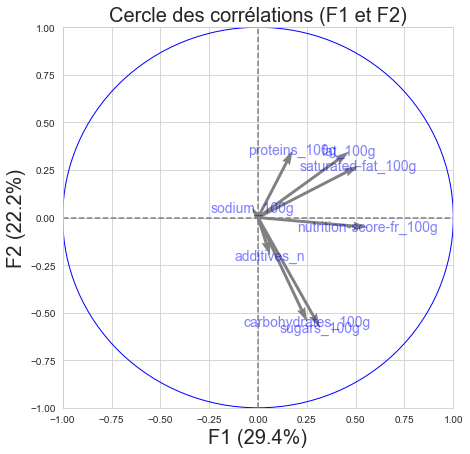

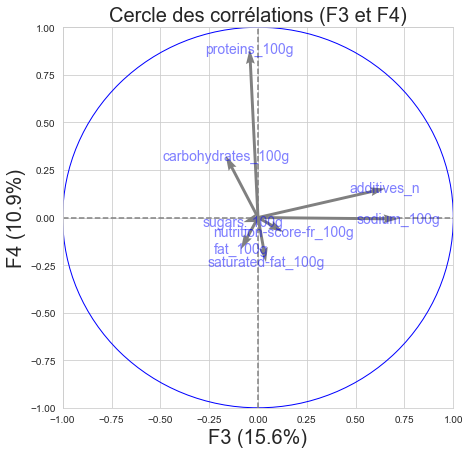

In [62]:
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

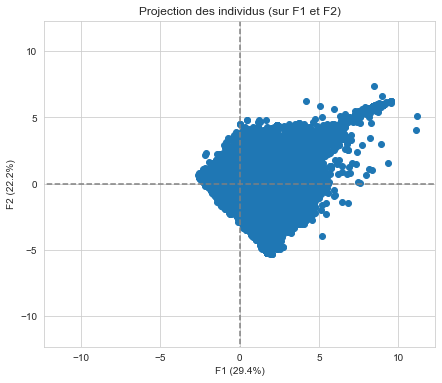

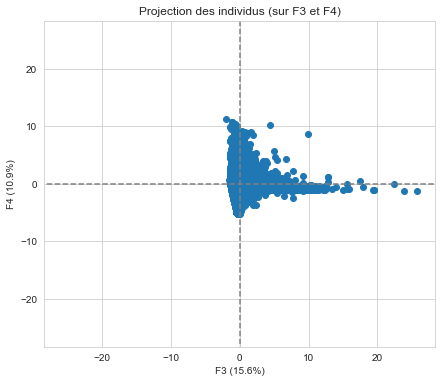

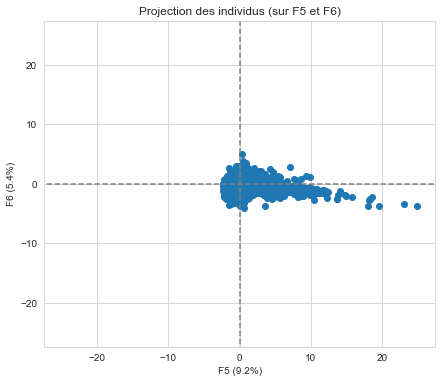

In [63]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = None)

plt.show()

# <a class="anchor" id="chapter4">IV. Conclusion</a> 

Pour l'application, puisque les variables rendant compte de l'empreinte carbone, de l'huile de palme et du nombre d'additifs ne sont pas assez renseignée. On laisse de côté l'idée de Made in Food.

On peut cependant se concentrer sur une classification des produits en fonction de 4 variables clés. Pour les deux premières, je prendrais carbohydrates_100g et fat_100g, la première étant fortement corrélées à saturated_fat_100g et la seconde à sugars_100g. Les deux autres variables que je retiendrais seraient proteins_100g et sodium_100g, l'apport en protéine étant une donnée intéressante d'un point de vue nutritionnel, et le sel étant un élément pouvant demander une monitorisation constante, de nombreux régime sans sel étant préconisé pour diverses raisons médicales (traitement, maladie,...). En bonus, il serait intéressant d'afficher le nutrigrade associé au produit, comme information complémentaire. 

On peut alors imaginer une application demandant à son utilisateur le type de régime suivi (sans sel, hyper protéiné, faible en gras...) et qui noterait les produits en fonction de ces objectifs, tout en recommandant d'autre produit avec moins de se, moins de gras, plus de protéine...Une application répondant aux vrais besoins de ses utilisateurs.